# Linear Regression

The term __“linearity”__ in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is __Linear Regression.__





image source : https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c

- y — The value that you want to predict
- β₀ — The y-intercept of the line means where the line intersects the Y-axis
- β₁ — The slope or gradient of the line means how steep is the line
- x — The value of the data point
- ε — The residual or noise that are caused by unexplained factors


Linear regression involving multiple variables is called __“multiple linear regression”__ or __multivariate linear regression__.


A real world example, Wine quality prediction. We have a dataset which has many features that are attributed to a red wine. Lets analyze data and predict quality on a training and test set. 

In [4]:
#import related libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [10]:
#read dataset

data = pd.read_csv('../data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# about dataset
data.shape

(1599, 12)

In [15]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [19]:
#check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Good news! no missing data -> Bit uncommon;


In [21]:
data.isnull().any() # just another way to check for missing data

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


Now that the data is good, lets separata values into predictors (X) and response variable (y). All column names that are attributes of the wine are assigned to X and 'Quality' as target variable y.


In [24]:
# All Predictors
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

#response Variable
y = data['quality'].values

## Analysis

What is the avg quality and top and low  values. 

2 ways to check. 
- Stat way
- visual way 

lets do both

In [25]:
# describe the Quality variable 
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

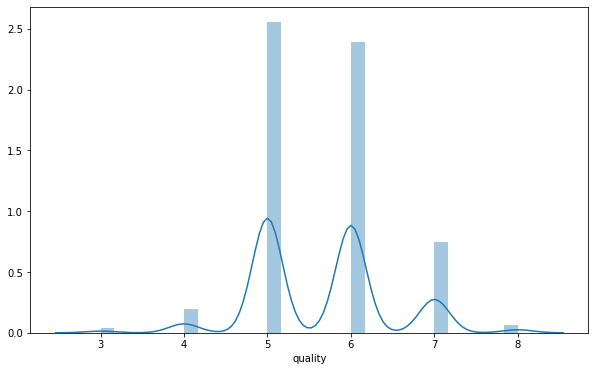

In [27]:
plt.figure(figsize=(10,6))
plt.tight_layout()
seabornInstance.distplot(data['quality'])


We come to know that 'Quality' of our wines dataset has values between 3.0-8.0. Mean at 5.6. Visually it shows most of our wines has a quality between 5 and 6.

In [28]:
#For us to predict we need to train our x and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
Xcolumns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

coeff_df = pd.DataFrame(regressor.coef_, Xcolumns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040



Now, negative coefficients indicate an increase in these feature attributes will decrease quality.

In [34]:
y_pred = regressor.predict(X_test)

Let's compare actual and predicted value in test

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


Visualize our prediction.

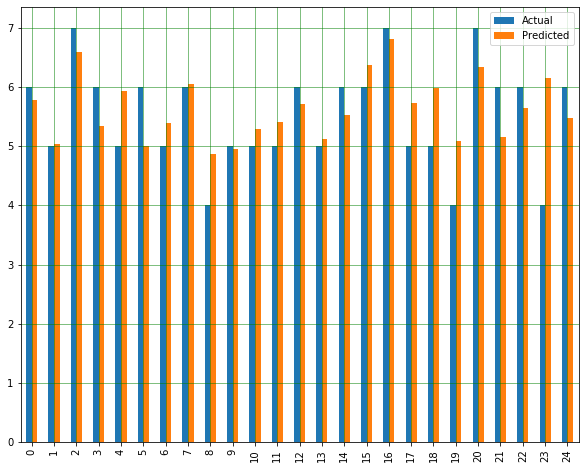

In [38]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

What is our models accuracy. There are couple of ways to asses it.

- __Mean Absolute Error (MAE)__ is the mean of the absolute value of the errors.
- __Mean Squared Error (MSE)__ is the mean of the squared errors.
- __Root Mean Squared Error (RMSE)__ is the square root of the mean of the squared errors.


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661114
Mean Squared Error: 0.38447119782012484
Root Mean Squared Error: 0.6200574149384271
